In [3]:
import pandas as pd
import os

# Create dataset

In [4]:
dataPath = os.getcwd() + '/court case data/testdata/'
caseCount = len(os.listdir(dataPath))
data = []
try:
    os.remove(dataPath + ".DS_Store")
except:
    print("No file DS_Store")
for filename in os.listdir(dataPath):
    f = open(os.path.join(dataPath, filename), encoding='utf-8')
    data.append([filename.replace('.txt', ''), f.read()])

verdict_df = pd.DataFrame(data, columns=["id", "case text"])
cases_df = pd.read_csv('./court case data/testdata.csv')
merged_df = cases_df.join(verdict_df.set_index('id'), on='id', how='left')

merged_df["verdict_date"] = pd.to_datetime(merged_df["verdict_date"])
merged_df["publication_date"] = pd.to_datetime(merged_df["publication_date"])

No file DS_Store


<ipython-input-4-79d4849703e4>:16: UserWarning: Parsing '23-06-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  merged_df["verdict_date"] = pd.to_datetime(merged_df["verdict_date"])
<ipython-input-4-79d4849703e4>:16: UserWarning: Parsing '13-04-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  merged_df["verdict_date"] = pd.to_datetime(merged_df["verdict_date"])
<ipython-input-4-79d4849703e4>:16: UserWarning: Parsing '28-05-2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  merged_df["verdict_date"] = pd.to_datetime(merged_df["verdict_date"])
<ipython-input-4-79d4849703e4>:16: UserWarning: Parsing '21-07-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  merged_df["verdict_date"] = pd.to_datetime(merged_df["verdict_date"])
<ipython-input-4-79d4849703e4>:16: UserW

<ipython-input-4-79d4849703e4>:17: UserWarning: Parsing '29-03-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  merged_df["publication_date"] = pd.to_datetime(merged_df["publication_date"])
<ipython-input-4-79d4849703e4>:17: UserWarning: Parsing '17-11-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  merged_df["publication_date"] = pd.to_datetime(merged_df["publication_date"])
<ipython-input-4-79d4849703e4>:17: UserWarning: Parsing '24-09-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  merged_df["publication_date"] = pd.to_datetime(merged_df["publication_date"])
<ipython-input-4-79d4849703e4>:17: UserWarning: Parsing '18-11-2008' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  merged_df["publication_date"] = pd.to_datetime(merged_df["publication_date"])
<ipython

In [5]:
merged_df

,id,verdict_date,publication_date,verdict_type,jurisdiction_type,case text
0,ECLI-NL-RBNNE-2021-5018,2021-01-10,2021-11-23,uitspraak,['Strafrecht'],\n\nRECHTBANK NOORD-NEDERLAND\nAfdeling strafr...
1,ECLI-NL-RBZUT-2003-AH9598,2003-03-06,2003-09-07,uitspraak,['Strafrecht'],\n\nRECHTBANK ZUTPHEN\nMeervoudige economische...
2,ECLI-NL-RBZWB-2020-2646,2020-06-23,2020-06-23,uitspraak,['Strafrecht'],\n\nRECHTBANK ZEELAND-WEST-BRABANT\n\nStrafrec...
3,ECLI-NL-GHAMS-2019-1601,2019-08-05,2019-07-26,uitspraak,['Strafrecht'],\n\nafdeling strafrecht\nparketnummer: 23-0017...
4,ECLI-NL-GHAMS-2019-1602,2019-08-05,2019-07-26,uitspraak,['Strafrecht'],\n\nafdeling strafrecht\nparketnummer: 23-0017...
...,...,...,...,...,...,...
18173,ECLI-NL-RBAMS-2013-1294,2013-01-29,2013-08-10,uitspraak,['Strafrecht'],\n\nRECHTBANK AMSTERDAM\n\n\nVONNIS\n\n \n\n13...
18174,ECLI-NL-PHR-2020-1106,2020-11-24,2020-11-24,conclusie,['Strafrecht'],\n\nPROCUREUR-GENERAAL\n\n\nBIJ DE\n\n\nHOGE R...
18175,ECLI-NL-GHAMS-2017-2618,2017-06-29,2017-05-07,uitspraak,['Strafrecht'],\n\n\nparketnummer: 23-001217-13\ndatum uitspr...
18176,ECLI-NL-RBAMS-2013-BZ0392,2013-01-29,2013-01-02,uitspraak,['Strafrecht'],\nRECHTBANK AMSTERDAM \nVONNIS \n\n13/529144-...


# Split documents

In [214]:
# -*- coding: utf-8 -*-
import re
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr|mr|mevr|mvr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|nl)"
articles = "[artikel ][0-9][.][0-9]"

def split_into_sentences2(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    text = re.sub(articles,"[artikelnummer]",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [230]:
def split_into_sentences(text):
    
    sentences = re.split(r'(?<=[^A-Z].[.?]) +(?=[A-Z])|\n', text)
    sentences = []
    [x for x in sents if not x.startswith('@$\t') and not x.startswith('#')]
    return sentences


Two ways of splitting the documents:
    For Word2Vec, we need sentences to be an array of words.
    For the rest, just the sentence is enough.

In [231]:
sentence_list_by_word = []
sentence_list = []

for i in range(len(merged_df)):
    doc = merged_df.iloc[i]['case text']
    sentences = split_into_sentences(doc)
    sentence_list.append(sentences)
    for j in sentences:
        word_list = [x for x in j.lower().rstrip().replace('.', '').split(' ') if len(x)>0]
        sentence_list_by_word.append(word_list)
        
print(len(sentence_list))
print(len(sentence_list_by_word))
# print(sentence_list[8])

18178
8557741


Testers:

In [232]:
for i in sentence_list[:1]:
    for j in i:
        print(j, '\n')

 

 

RECHTBANK NOORD-NEDERLAND 

Afdeling strafrecht  

 

Locatie Leeuwarden 

  

 

parketnummer 18/048259-21 

  

 

 

Vonnis van de meervoudige kamer voor de behandeling van strafzaken d.d. 1 oktober 2021 in de zaak van het openbaar ministerie tegen de verdachte  

 

  

 

 

 

      [verdachte]  

 

geboren op [geboortedatum] 1971 te [geboorteplaats]  

thans gedetineerd te [instelling]. 

  

 

Dit vonnis is gewezen naar aanleiding van het onderzoek ter terechtzitting van 17 september 2021. 

Verdachte is verschenen bijgestaan door mr. 

A.C. 

Huisman advocaat te Deventer. 

Het openbaar ministerie is ter terechtzitting vertegenwoordigd door mr. 

E.R. 

Jepkema. 

  

 

 

Tenlastelegging 

Aan verdachte is na nadere omschrijving van de tenlastelegging ten laste gelegd dat:  

 

1. 

hij in of omstreeks de periode van 1 oktober 2020 tot en met 19 februari 2021 meerdere malen althans eenmaal telkens te Minnertsga gemeente Waadhoeke tezamen en in vereniging met een of 

In [ ]:
for i in sentence_list_by_word[:1]:
    for j in i:
        print(j, '\n')

# Create Word2Vec model

In [16]:
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

Create and save model

In [17]:
dutch_word2vec_model = Word2Vec(sentences=sentence_list_by_word, vector_size=100, window=5, min_count=1, workers=4)
dutch_word2vec_model.save("word2vec_dutch_court_cases.model")

Load model

In [ ]:
dutch_word2vec_model = Word2Vec.load("word2vec_dutch_court_cases.model")

In [147]:
sims = dutch_word2vec_model.wv.most_similar('per', topn=100)
print([i[0] for i in sims])
# print(sims)

['elke', 'tweeënhalve', 'iedere', ':\t\tvolgende', 'anderhalve', 'klanten/', 'drieënhalve', '“volgende', 'aankomende', 'vijfeneenhalve', '4[artikelnummer]1670', 'gipskamer', 'sx', '763-per', '(5', 'stel:', 'dosage)', 'tweeëneenhalve', 'transportwerkzaamheden', '95[artikelnummer]37', '15:04:46', '\t“per', 'erna', 'ophaalmomenten', 'x', '1200', '6%', '(20', '5000\t1', 'eurocent;', 'stuks’"', '(10', '[artikelnummer]9591', 'klokkijken', 'preservind', '>', '020', '500', '10-', '363--', 'deelsom', '9200\t1', 'comuniseert', '400', '8[artikelnummer]62;', '38op', 'turinabol)', 'halend', '[artikelnummer]4939', 'minstens', '2-', '1600', '050', '125', '(per', '<', '800', '25-', '-\t4', 'mg', 'gemiddeld', 'wurtjes', 'passports', '19268', 'oktober:', '(/de', '½', 'zonneschijn', '1000', 'vorige', '=)', '4000', 'exclusief', '900', 'maximaal', '23168', '15:30:43', '0', '(ruim', '([artikelnummer]00', 'koeltrailers', '45[artikelnummer]00--', '(2', 'réfèrent', 'sijsma', '(2[artikelnummer]', 'ng/m3', 'one-

### Create list of drugs, smuggle, quantity keywords with Word2Vec model

Drugs list:

In [71]:
list_of_drugs = ['xtc', 'mdma', 'cocaine', 'wiet', 'speed', 'bmk', 'pmk']
word2vec_drug_list = []
for drug in list_of_drugs:
    results = dutch_word2vec_model.wv.most_similar(drug, topn=100)
    for i in results:
        word2vec_drug_list.append(i[0])

word2vec_drug_list = list(set([i for i in word2vec_drug_list if word2vec_drug_list.count(i)>2]))
print(len(word2vec_drug_list))
print(word2vec_drug_list)

80
['(olie)', 'ghb', 'pillen', 'paracetamol', 'speed', 'ecstasy', '(mdma)', 'meth', 'ketamine', 'mdma/mda', 'amfetamineolie', 'manitol', 'mdma-poeder', 'hashish', 'eindproduct', 'cocaïne', 'pillen)', 'amfetamine', 'lsd', 'xtc-tabletten', 'lactose', 'amfetaminesulfaat', 'hci', 'methadon', 'azijnzuuranhydride', 'hennep', 'kunstmest', 'cocaine', 'gbl', 'lidocaïne', 'methamfetamine', 'xtc', 'amfetaminebase', 'crystal', 'mdma)', '(met)amfetamine', 'crack', 'heroïne)', 'xtc-pillen', 'hash', 'xtc/mdma', 'weed', 'opium', 'morfine', 'amfetaminepasta', '2cb', 'mefedron', 'oxazepam', 'hasjiesj', 'amfetamine)', 'platina', 'n-formylamfetamine', 'pep', 'amfetaminen', 'mdma-kristallen', 'fenacetine', 'hasj', '34-mdma', '2-cb', 'levamisol', 'harddrugs', '2c-b', 'heroïne', 'marihuana', 'temazepam', 'speed/amfetamine', 'metamfetamine', 'coke', 'poedervorm', 'd-metamfetamine', 'diazepam', '34-methyleendioxymethamfetamine', 'cafeïne', 'hennep)', 'kristallen', 'mdma', 'mapa', 'mdma-hcl', 'cannabis', 'inosi

Smuggle keyword list:

In [84]:
list_of_smuggle_words = ['smokkel', 'invoer', 'uitvoer', 'import', 'export', 'transport']
word2vec_smuggle_list = []
for word in list_of_smuggle_words:
    results = dutch_word2vec_model.wv.most_similar(word, topn=100)
    for i in results:
        word2vec_smuggle_list.append(i[0])

word2vec_smuggle_list = list(set([i for i in word2vec_smuggle_list if word2vec_smuggle_list.count(i)>3]))
print(len(word2vec_smuggle_list))
print(word2vec_smuggle_list)
word2vec_smuggle_list = word2vec_smuggle_list + list_of_smuggle_words 

39
['uithalen', 'importeren', 'productie', 'drugssmokkel', 'doorverkoop', 'aanvoer', 'vervaardiging', 'bronland', 'hennepteelt', 'import', 'cocaïnehandel', 'gesmokkelde', 'bronlanden', 'terugwinnen', 'produktie', 'verkoop', 'kweek', 'straatverkoop', 'verscheping', 'transsport', 'smokkel', 'versnijding', 'exporteren', 'invoer', 'doorvoer', 'levering', 'opzetten', 'invoeren', 'export', 'fabricage', '(invoer', 'transporteren', 'proefmonster', 'leverantie', 'hasjhandel', 'handel', 'leveranciers', 'productie/verwerking', 'bewerking']


Quantity keyword list:

In [190]:
list_of_quantity_words = ['tabletten', 'kilo', 'gram', 'pakketten']
word2vec_quantity_list = []
for word in list_of_quantity_words:
    results = dutch_word2vec_model.wv.most_similar(word, topn=100)
    for i in results:
        word2vec_quantity_list.append(i[0])

word2vec_quantity_list = list(set([i for i in word2vec_quantity_list if word2vec_quantity_list.count(i)>1]))
print(len(word2vec_quantity_list))
print(word2vec_quantity_list)


79
['centiliter', '1993/330', 'mg', 'planten', 'pillen', 'zakjes', 'potten', 'ton', 'mdma/mda', 'gripzakken', 'planten)', 'sealbags', 'brokken', 'gr', 'liter;', 'promille', 'pillen)', 'wikkels', 'potjes', 'm³', 'm2', 'joints', 'mg)', 'watt', 'mg/l', 'gram)', 'sealtjes', 'plakken', 'mdma-pillen', 'km', 'kilo;', 'kilo)', 'flacons', 'drums', 'bolletjes)', 'planten”', 'milliliter', 'bolletjes', 'liter)', 'cm)', 'kilo', 'xtc-pillen', '(verpakt', 'seals', 'kilogram)', 'hennepplanten;', 'gram”', 'meter)', 'gram;', 'kg', 'gripzakjes', 'kg;', 'blokjes', 'flessen', 'vaatjes', 'kg)', 'emmers', 'brokjes', 'stuks', 'tabletten/pillen', 'tabletten', 'bollen', 'liter', 'ponypacks', 'gram);', 'ml', 'db(a)', 'gram:', 'bakjes', '(xtc-)pillen', 'pakketten', 'kilogram;', '(totaalgewicht', 'blokken', 'mg/ml', 'kilogram', 'slikkersbollen', 'pillen/tabletten', 'm²']


Country list:

In [130]:
list_of_countries = ['duitsland', 'colombia']
word2vec_country_list = []
for word in list_of_countries:
    results = dutch_word2vec_model.wv.most_similar(word, topn=100)
    for i in results:
        word2vec_country_list.append(i[0])

word2vec_country_list = list(set([i for i in word2vec_country_list if word2vec_country_list.count(i)>1]))
print(len(word2vec_country_list))
print(word2vec_country_list)

81
['cyprus', 'madrid', 'parijs', 'afrika', 'bogota', 'sydney', 'syrië', 'berlijn', 'amsterdam-noord', 'venezuela', 'europa', 'ghana', 'marokko', 'servië', 'slowakije', 'rica', 'noorwegen', 'dubai', 'zwitserland', 'trinidad', 'brazilië', 'engeland', 'nigeria', 'congo', 'mexico', 'santa', 'groot-brittannië', 'malaga', 'oekraïne', 'lissabon', 'portugal', 'turkije', 'amerika', 'kroatië', 'lima', 'oostenrijk', 'griekenland', 'natal', 'costa', 'bulgarije', 'iran', 'suriname', 'tanger', 'peru', 'australië', 'paramaribo', 'zuid-afrika', 'spanje', 'guayaquil', 'zweden', 'denemarken', 'finland', 'jamaica', 'guatemala', 'thailand', 'zuid-amerika', 'polen', 'antwerpen', 'rusland', 'caracas', 'argentinië', 'ecuador', 'panama', 'buitenland', 'ierland', 'barcelona', 'albanië', 'pakistan', 'frankrijk', 'canada', 'italië', 'luxemburg', 'roemenië', 'curaçao', 'bosnië', 'hamburg', 'tsjechië', 'belgië', 'hongarije', 'dominicaanse', 'kenia']


# Create SpaCy model

In [216]:
import spacy
from spacy import displacy
# !python -m spacy download nl_core_news_md
nlp = spacy.load('nl_core_news_md')


In [217]:
my_file = open("drugs list.txt", "r", encoding='utf-8')
my_file = my_file.readlines()
drugs_list = []
for i in my_file:
    drugs_list.append(i.replace('\n', ''))

my_file = open("countries list.txt", "r", encoding='utf-8')
my_file = my_file.readlines()
countries_list = []
for i in my_file:
    countries_list.append(i.replace('\n', ''))
countries_list = countries_list + word2vec_country_list

In [218]:
complete_drugs_list = list(set(drugs_list + word2vec_drugs_list))

In [219]:
def configure_spacy_model():
    # Create dict of drug pattern and quantity pattern
    pattern_list = []
    
    drugs_ent_list = []
    for i in complete_drugs_list:
        pattern_list.append({"label": "DRUG", "pattern": [{"lower": i}]})
    
#     quantity_rule = {"label": "QUANTITY", "pattern": [{"IS_DIGIT": True}, {"LOWER": "gram"}]}
#     pattern_list.append(quantity_rule)
    for i in word2vec_quantity_list:
        pattern_list.append({"label": "QUANTITY", "pattern": [{"IS_DIGIT": True}, {"LOWER": i}]})
        pattern_list.append({"label": "QUANTITY", "pattern": [{"ENT_TYPE": "CARDINAL"}, {"LOWER": i}]})
    
    for i in countries_list:
        pattern_list.append({"label": "GPE", "pattern": [{"lower": i.replace(' ', '').lower()}]})
    
    # Add drug and quantity rules to the model
    config = {
   "phrase_matcher_attr": None,
   "validate": True,
   "overwrite_ents": True,
   "ent_id_sep": "||",
    }
    ruler = nlp.add_pipe("entity_ruler", config=config)

    #List of Entities and Patterns
#     patterns = drugs_ent_list
    ruler.add_patterns(pattern_list)

In [220]:
configure_spacy_model()

# Select cases and chunks to keep

In [82]:
print(len(sentence_list) == len(merged_df))

True


For every case, split the sentences. If a sentence in a case contains a drug, a smuggle word, and a location: keep chunk and save to trafficking_df

In [222]:
relevant_chunk_list = []
ecli_list = []

for index, case in enumerate(sentence_list):
    chunk_list = []
    trafficking_related = False
    for chunk in case:
        if any(drug in chunk for drug in word2vec_drug_list) and any(smuggle_word in chunk for smuggle_word in word2vec_smuggle_list):
            ents = nlp(chunk).ents
            if any(ent.label_ == "GPE" or ent.label_ == "LOC" for ent in ents):
                trafficking_related = True
                chunk_list.append(chunk)
    
    if trafficking_related:
        relevant_chunk_list.append(chunk_list)
        ecli_list.append(merged_df.iloc[index]['id'].replace('-', ':'))

trafficking_df = pd.DataFrame({'id': pd.Series(ecli_list), 'chunks': pd.Series(relevant_chunk_list)})
          
                

In [223]:
print(f"{len(trafficking_df)} cases kept from original {len(merged_df)} cases.")


4669 cases kept from original 18178 cases.


# Create rule-based NER & POS tagging model

In [224]:
def extract_chunk_info(txt):
    source_country = None
    total_info = []
    for token in nlp(txt):
        info = {}
        drug_info = {}
        countries = []
        
        if token.ent_type_ == "DRUG":
            info = {"drug": token.text}
            
            ## Get source and destination
            for ancestor in token.ancestors:
                for nephew in ancestor.children:
                    if nephew.ent_type_ == "GPE" or nephew.ent_type_ == "LOC":
                        countries.append(nephew)
                        for child in nephew.children:
                            if child.dep_ == "conj" and child.ent_type_ == "GPE" or child.ent_type_ == "LOC":
                                countries.append(child.text)
                            elif child.pos_ == "ADP" and child.dep_ == "case":
                                adj = child.text
            if len(countries) > 0 :
                try:
                    info[adj] = countries
                except:
                    info['land'] = countries
                        
            ## Get volume
            for ancestors in token.ancestors:
                for nephew in ancestors.children:
                    if nephew.ent_type_ == "QUANTITY" or nephew.ent_type_ == "CARDINAL":
                        for second_nephew in nephew.children:
                            if second_nephew.is_digit != nephew.is_digit:
                                if second_nephew.is_digit:
                                    info['volume'] = second_nephew.text
                                    info['volume_type'] = nephew.text
                                else:
                                    info['volume'] = nephew.text
                                    info['volume_type'] = second_nephew.text
            if 'volume' not in info:
                for child in token.children:
                    if (child.dep_ == "det" and child.like_num) or (child.dep_ == "nummod"):
                        info['volume'] = child.text
                                
        if len(info) > 1:
#             print(info)
            total_info.append(info)
    return total_info

In [225]:
from_case = 10
to_case = 20

for index in range(len(trafficking_df[:from_case+to_case])):
    if index >= from_case:
        chunks = trafficking_df.iloc[index]['chunks']
        for chunk in chunks:
            displacy.render(nlp(chunk), style="ent")
            info = extract_chunk_info(chunk)
            print(info)

[]


[]


[]


[{'drug': 'cocaïne', 'volume': '100', 'volume_type': 'kilo'}]


[]


[{'drug': 'cocaïne', 'in': [Rotterdam]}]


[]


[]


[]


[{'drug': 'cocaïne', 'volume': '234', 'volume_type': 'milliliter'}]


[]


[{'drug': 'cocaïne', 'in': [Nederland]}]


[]


[{'drug': 'cocaïne', 'in': [Rotterdam]}]


[]


[]


[]


[{'drug': 'cocaïne', 'volume': '234', 'volume_type': 'milliliter'}]


[]


[{'drug': 'cocaïne', 'in': [Nederland, Nederland]}]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[]


[{'drug': 'cocaïne', 'naar': [Jamaica]}]


[{'drug': 'hasjiesj', 'naar': [Nederland], 'volume': '000', 'volume_type': 'kg'}]


[{'drug': 'hasjiesj', 'op': [Noordzee]}]


[]


[]


[]


[]


[]


[{'drug': 'amfetamine', 'volume': '34', 'volume_type': 'gram'}, {'drug': 'amfetamine', 'volume': '34', 'volume_type': 'gram'}]


[{'drug': 'amfetamine', 'volume': '34', 'volume_type': 'gram'}]


[]


[{'drug': 'harddrugs', 'in': [Nederland]}]


[]


[]


[{'drug': 'cocaïne', 'in': [Nederland]}]


[]


[]


[{'drug': 'hash', 'vanuit': [Marokko]}]


[{'drug': 'hasjiesj', 'naar': [Nederland], 'volume': '000', 'volume_type': 'kg'}]


[{'drug': 'hasjiesj', 'op': [Noordzee]}]


[]


[{'drug': 'metamfetamine', 'volume': '562', 'volume_type': 'gram'}, {'drug': 'heroïne', 'volume': '562', 'volume_type': 'gram'}, {'drug': 'metamfetamine', 'volume': '562', 'volume_type': 'gram'}]


[{'drug': 'ketamine', 'volume': '1509', 'volume_type': 'gram'}]


[]


[]


[]


In [197]:
def extract_chunk_info2(txt):
    source_country = None
    total_info = []
    for token in nlp(txt):
        info = {}
        drug_info = {}
        countries = []
        
        if token.ent_type_ == "DRUG":
            info = {"drug": token.text}
            
            ## Get source and destination
            for ancestor in token.ancestors:
                for nephew in ancestor.children:
                    if nephew.ent_type_ == "GPE" or nephew.ent_type_ == "LOC":
                        countries.append(nephew)
                        for child in nephew.children:
                            if child.dep_ == "conj" and child.ent_type_ == "GPE" or child.ent_type_ == "LOC":
                                countries.append(child.text)
                            elif child.pos_ == "ADP" and child.dep_ == "case":
                                adj = child.text
            if len(countries) > 0 :
                try:
                    info[adj] = countries
                except:
                    info['land'] = countries
                        
            ## Get volume
            for ancestors in token.ancestors:
                for nephew in ancestors.children:
                    if nephew.ent_type_ == "QUANTITY" or nephew.ent_type_ == "CARDINAL":
                        for second_nephew in nephew.children:
                            if second_nephew.is_digit != nephew.is_digit:
                                if second_nephew.is_digit:
                                    info['volume'] = second_nephew.text
                                    info['volume_type'] = nephew.text
                                else:
                                    info['volume'] = nephew.text
                                    info['volume_type'] = second_nephew.text
            if 'volume' not in info:
                for child in token.children:
                    if (child.dep_ == "det" and child.like_num) or (child.dep_ == "nummod"):
                        info['volume'] = child.text
                                
        if len(info) > 0:
#             print(info)
            total_info.append(info)
    return total_info

In [198]:
import visualise_spacy_tree
from IPython.display import Image

In [199]:
doc = "Maandagochtend 9 november is de verdachte aangehouden op verdenking van de smokkel van 9 pakketten kilo cocaine van Nederland naar het noorden van Duitsland"



In [200]:
extract_chunk_info2((doc))

[{'drug': 'cocaine', 'volume': '9', 'volume_type': 'pakketten'}]

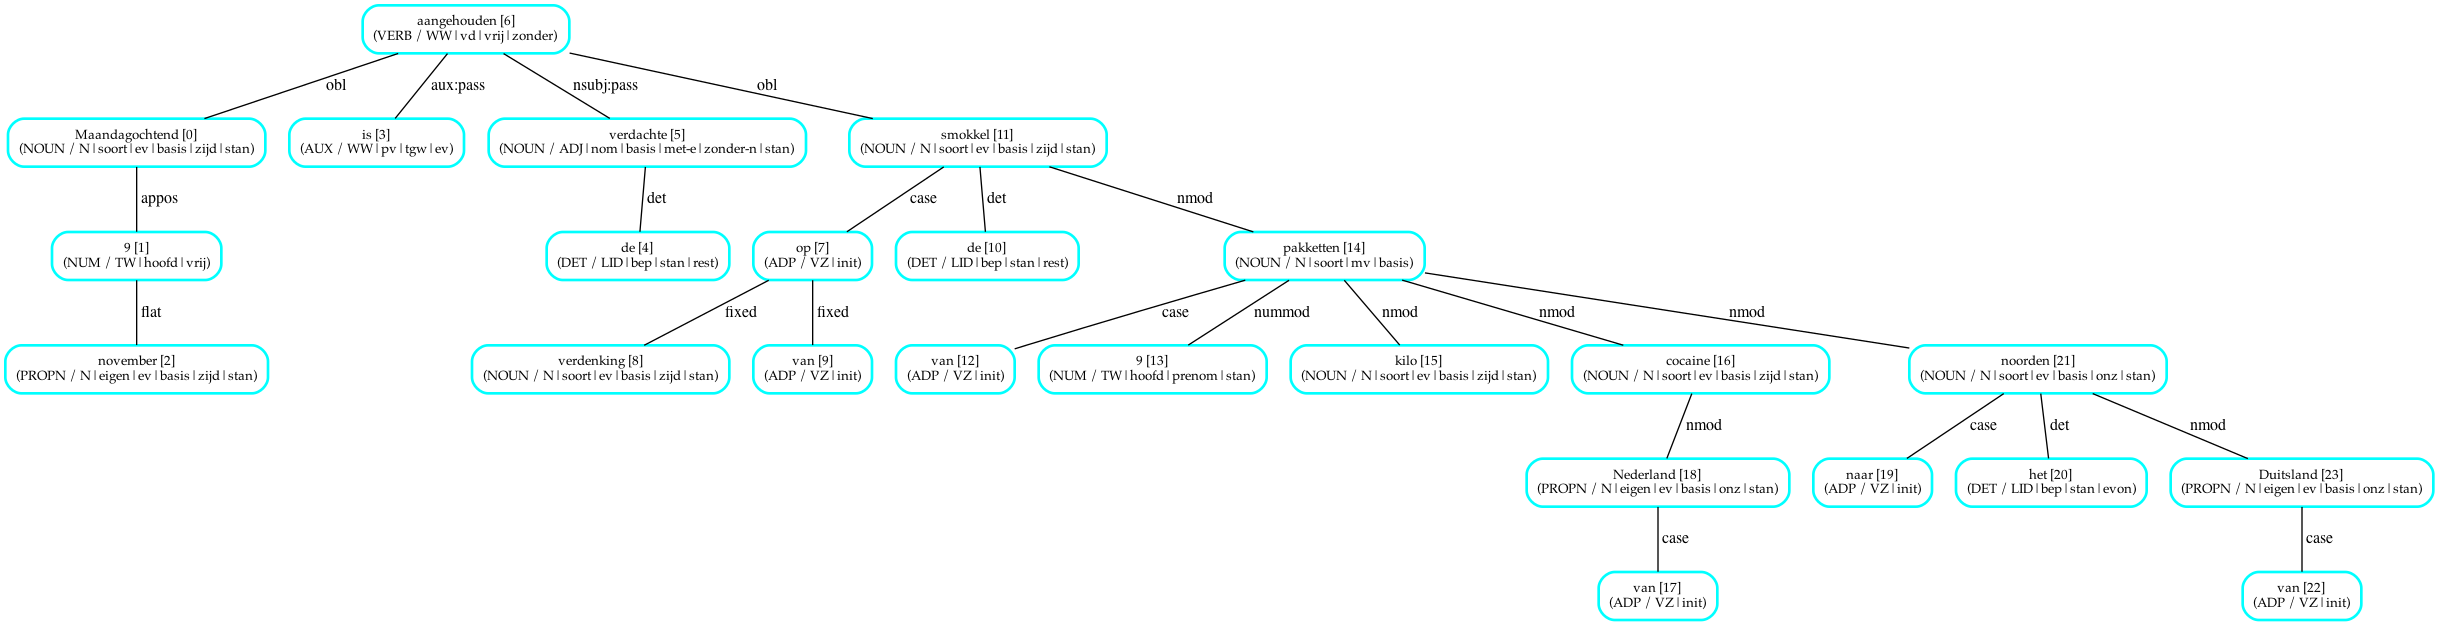

In [201]:
png = visualise_spacy_tree.create_png(nlp(doc))
display(Image(png))

In [202]:
displacy.render(nlp(doc), style="dep")

In [203]:
doc = "De verdachte heeft 9 kilo mdma gesmokkeld van Nederland naar Belgie"

In [204]:
extract_chunk_info((doc))


[{'drug': 'mdma',
  'naar': [Nederland, Belgie],
  'volume': '9',
  'volume_type': 'kilo'}]

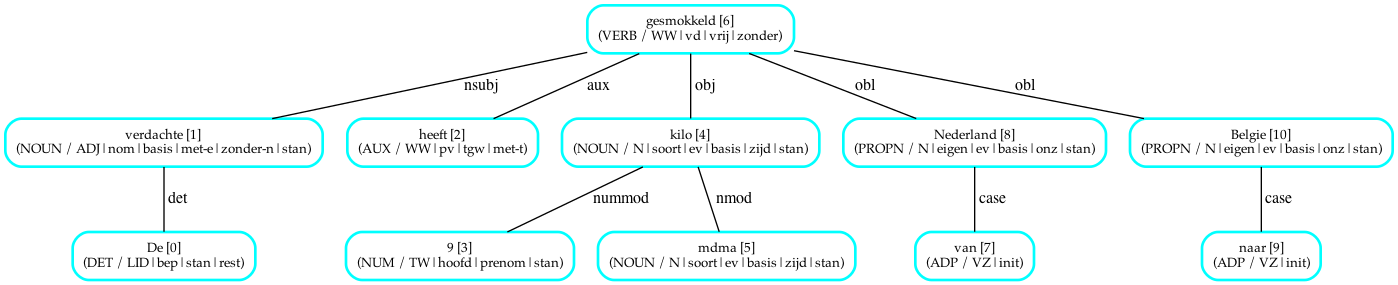

In [205]:
png = visualise_spacy_tree.create_png(nlp(doc))
display(Image(png))

In [176]:
displacy.render(nlp(doc), style="dep")

In [ ]:
doc = ""